In [1]:
#XGBOOST==>Extreme Gradient Boosting

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
%load_ext rpy2.ipython

In [4]:
%cp gdrive/MyDrive/library.tar.gz .

In [5]:
!tar xf library.tar.gz


tar: Removing leading `/' from member names


In [6]:
%%R
.libPaths('usr/local/lib/R/site-library/')

In [7]:
%%R
install.packages("caTools")

R[write to console]: Installing package into ‘/content/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/caTools_1.18.2.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 64960 bytes (63 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =

In [8]:
%%R
library(data.table) 
library(dplyr)      
library(ggplot2)  
library(caret)     
library(xgboost)    
library(e1071)      
library(cowplot)    
library(Matrix)
library(magrittr)
library(glmnet)
library(groupdata2)
library(caTools)

R[write to console]: data.table 1.14.2 using 1 threads (see ?getDTthreads).  Latest news: r-datatable.com

R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:data.table’:

    between, first, last


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


R[write to console]: Loading required package: lattice

R[write to console]: 
Attaching package: ‘xgboost’


R[write to console]: The following object is masked from ‘package:dplyr’:

    slice


R[write to console]: Loaded glmnet 4.1-3



In [9]:
%%R
data = read.csv('/content/gdrive/My Drive/DS_CP/diabetes.csv')

In [10]:
%%R
colnames(data)

[1] "Pregnancies"              "Glucose"                 
[3] "BloodPressure"            "SkinThickness"           
[5] "Insulin"                  "BMI"                     
[7] "DiabetesPedigreeFunction" "Age"                     
[9] "Outcome"                 


In [11]:
%%R
dim(data)

[1] 768   9


In [12]:
%%R
sapply(data, function(x) sum(is.na(x)))

             Pregnancies                  Glucose            BloodPressure 
                       0                        0                        0 
           SkinThickness                  Insulin                      BMI 
                       0                        0                        0 
DiabetesPedigreeFunction                      Age                  Outcome 
                       0                        0                        0 


In [13]:
%%R
summary(data)

  Pregnancies        Glucose      BloodPressure    SkinThickness  
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    Insulin           BMI        DiabetesPedigreeFunction      Age       
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780           Min.   :21.00  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437           1st Qu.:24.00  
 Median : 30.5   Median :32.00   Median :0.3725           Median :29.00  
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719           Mean   :33.24  
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262           3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200           Max.   :81.00  
    Outcome  

In [14]:
%%R
str(data)

'data.frame':	768 obs. of  9 variables:
 $ Pregnancies             : int  6 1 8 1 0 5 3 10 2 8 ...
 $ Glucose                 : int  148 85 183 89 137 116 78 115 197 125 ...
 $ BloodPressure           : int  72 66 64 66 40 74 50 0 70 96 ...
 $ SkinThickness           : int  35 29 0 23 35 0 32 0 45 0 ...
 $ Insulin                 : int  0 0 0 94 168 0 88 0 543 0 ...
 $ BMI                     : num  33.6 26.6 23.3 28.1 43.1 25.6 31 35.3 30.5 0 ...
 $ DiabetesPedigreeFunction: num  0.627 0.351 0.672 0.167 2.288 ...
 $ Age                     : int  50 31 32 21 33 30 26 29 53 54 ...
 $ Outcome                 : int  1 0 1 0 1 0 1 0 1 1 ...


In [15]:
%%R
data<-upsample(
  data,
  cat_col= "Outcome",
  id_col = NULL,
  id_method = "n_ids",
  mark_new_rows = FALSE
)

In [16]:
%%R
set.seed(42)   # set seed - same random numbers generated
train_ind = sample.split(data, SplitRatio = 0.8)
train = data[train_ind,] #creates the training dataset with row numbers stored in train_ind
test= data[!train_ind,]

In [17]:
%%R
sparse_matrix <- sparse.model.matrix(Outcome ~ ., data = train)[,-1]

In [18]:
%%R
y_train<-train$Outcome

In [19]:
%%R
bst <- xgboost(data = sparse_matrix, label = y_train, max_depth = 10, eta = 0.07, nthread = -1,nrounds = 20,objective = "binary:logistic")

[08:14:25] WARNING: amalgamation/../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[1]	train-logloss:0.649778 
[2]	train-logloss:0.612069 
[3]	train-logloss:0.578550 
[4]	train-logloss:0.547688 
[5]	train-logloss:0.520536 
[6]	train-logloss:0.495411 
[7]	train-logloss:0.471921 
[8]	train-logloss:0.450902 
[9]	train-logloss:0.431407 
[10]	train-logloss:0.412657 
[11]	train-logloss:0.395343 
[12]	train-logloss:0.377873 
[13]	train-logloss:0.362416 
[14]	train-logloss:0.347569 
[15]	train-logloss:0.333976 
[16]	train-logloss:0.320562 
[17]	train-logloss:0.308509 
[18]	train-logloss:0.296703 
[19]	train-logloss:0.286198 
[20]	train-logloss:0.276155 


In [20]:
%%R
y_test<-test$Outcome
test_n <- sparse.model.matrix(Outcome ~ ., data = test)[,-1]

In [21]:
%%R
pred <- predict(bst, test_n)
# get & print the classification error
err <- mean(as.numeric(pred > 0.5) != y_test)
print(paste("test-error=", err))
accuracy = 1-err
print(paste("Accuracy of XGBoost model is:",accuracy))

[1] "test-error= 0.139013452914798"
[1] "Accuracy of XGBoost model is: 0.860986547085202"


In [22]:
%%R
importanceRaw <- xgb.importance(feature_names = colnames(sparse_matrix), model = bst, data = sparse_matrix, label = y_train)
importanceClean <- importanceRaw[,`:=`(Cover=NULL, Frequency=NULL)]
head(importanceClean)

                    Feature       Gain
1:                  Glucose 0.34356143
2:                      BMI 0.21091522
3: DiabetesPedigreeFunction 0.11857817
4:                  Insulin 0.09544527
5:                      Age 0.07732352
6:            BloodPressure 0.06845547


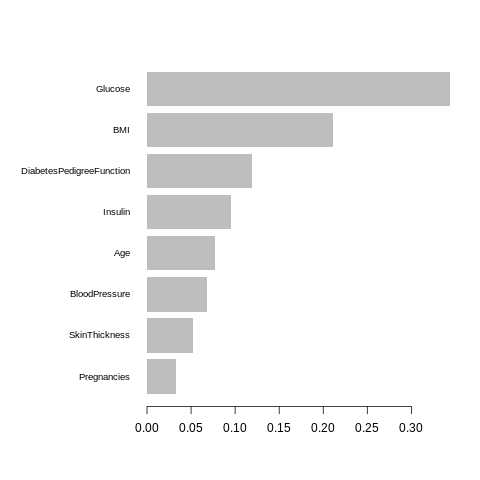

In [23]:
%%R
xgb.plot.importance(importance_matrix = importanceRaw)